In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf



In [54]:
'''(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')'''

"(X_train, y_train), (X_test, y_test) = mnist.load_data()\n\nprint(f'Training data shape: {X_train.shape}')\nprint(f'Test data shape: {X_test.shape}')"

In [55]:
# Load data from CSV files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [56]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values
    y_test = test['label'].values
else:
    X_test = test.values
    y_test = None


In [61]:
X_train_images = X_train.reshape(-1, 28, 28)

In [62]:
# Flatten and normalize
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


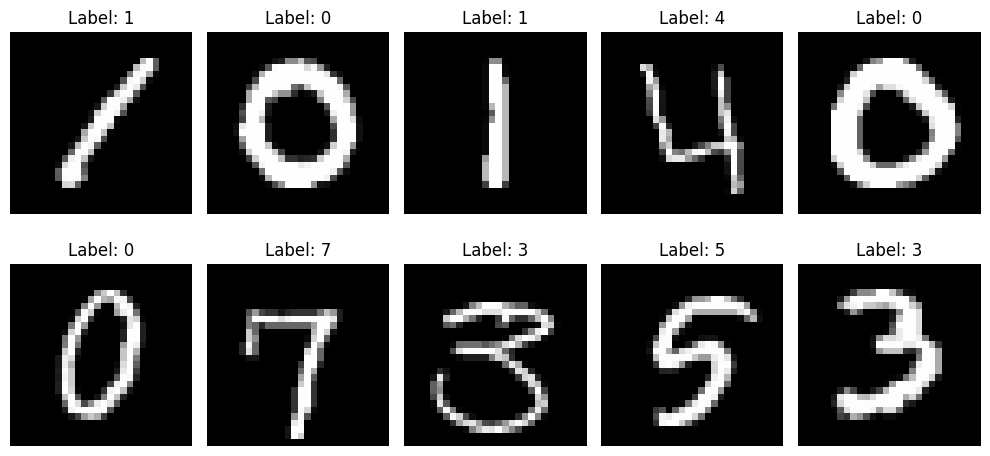

In [63]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [64]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


KNN Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



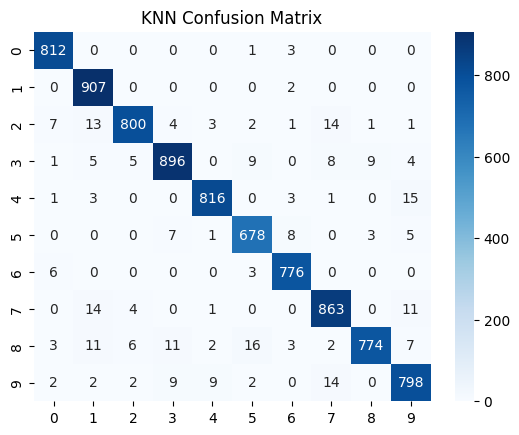

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.96      0.98      0.97       909
           2       0.91      0.93      0.92       846
           3       0.91      0.91      0.91       937
           4       0.93      0.95      0.94       839
           5       0.90      0.90      0.90       702
           6       0.96      0.95      0.95       785
           7       0.95      0.93      0.94       893
           8       0.92      0.89      0.90       835
           9       0.94      0.91      0.92       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



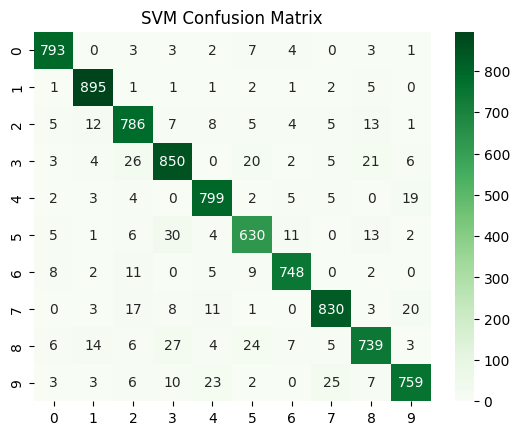

In [66]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


KNN Validation Accuracy: 0.9741
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.97      1.00      0.98      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.95      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



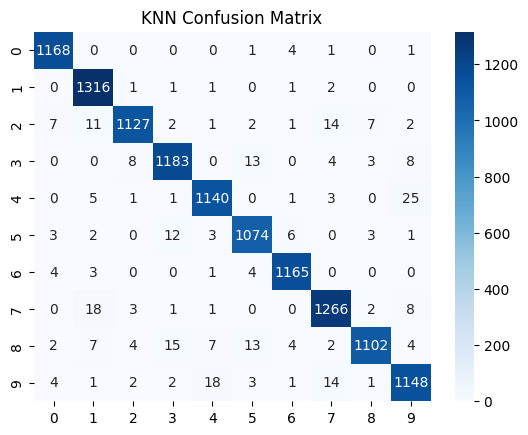

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)#overfit , chances of high accuracy
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



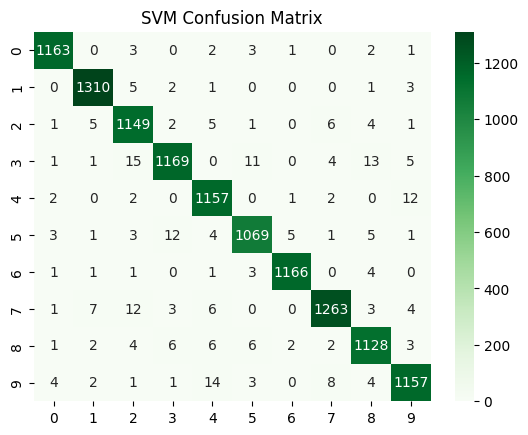

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9696
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.95      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



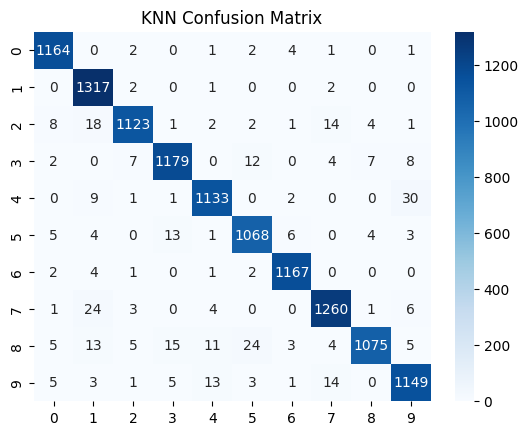

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()

clf.fit(X_train_split, y_train_split)

y_val_pred_clf = clf.predict(X_val)#random seeding no random_state given so different ans different run

clf_acc = accuracy_score(y_val, y_val_pred_clf)
print(f'clf Validation Accuracy: {clf_acc:.4f}')

print(classification_report(y_val, y_val_pred_clf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()

clf Validation Accuracy: 0.8691
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1175
           1       0.93      0.96      0.95      1322
           2       0.86      0.86      0.86      1174
           3       0.83      0.83      0.83      1219
           4       0.85      0.87      0.86      1176
           5       0.83      0.82      0.83      1104
           6       0.91      0.90      0.90      1177
           7       0.90      0.90      0.90      1299
           8       0.82      0.78      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)

clf.fit(X_train_split, y_train_split)

y_val_pred_clf = clf.predict(X_val)#random seeding no random_state given so different ans different run

clf_acc = accuracy_score(y_val, y_val_pred_clf)
print(f'clf Validation Accuracy: {clf_acc:.4f}')

print(classification_report(y_val, y_val_pred_clf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()

clf Validation Accuracy: 0.8681
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1175
           1       0.93      0.96      0.95      1322
           2       0.85      0.85      0.85      1174
           3       0.84      0.84      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.83      0.81      0.82      1104
           6       0.90      0.89      0.90      1177
           7       0.90      0.91      0.90      1299
           8       0.82      0.79      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [ ]:
'''from sklearn import ensemble
rf=ensemble.RandomForestClassifier(random_state=42)

rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)#random seeding no random_state given so different ans different run

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'clf Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()

Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimized Decision Tree Validation Accuracy: 0.8719
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1175
           1       0.91      0.97      0.94      1322
           2       0.84      0.87      0.85      1174
           3       0.84      0.84      0.84      1219
           4       0.85      0.88      0.87      1176
           5       0.84      0.82      0.83      1104
           6       0.92      0.88      0.90      1177
           7       0.91      0.91      0.91      1299
           8       0.82      0.78      0.80      1160
           9       0.85      0.84      0.84      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



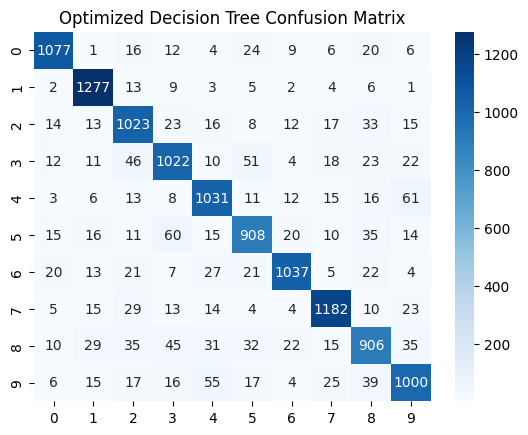

'y_val_pred_rf = best_rf_model.predict(X_val)\nrf_acc = accuracy_score(y_val, y_val_pred_rf)\nprint(f\'Optimized Random Forest Validation Accuracy: {rf_acc:.4f}\')\nprint(classification_report(y_val, y_val_pred_rf))\nsns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.title("Optimized Random Forest Confusion Matrix")\nplt.show()'

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grids for Decision Tree and Random Forest
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

'''rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}'''

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
#rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_split, y_train_split)

'''# Set up GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_split, y_train_split)'''

# Get the best models
best_dt_model = dt_grid_search.best_estimator_
#best_rf_model = rf_grid_search.best_estimator_

# Display best parameters for each model
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
#print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Evaluate Decision Tree model on validation set
y_val_pred_dt = best_dt_model.predict(X_val)
dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Optimized Decision Tree Validation Accuracy: {dt_acc:.4f}')
print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Optimized Decision Tree Confusion Matrix")
plt.show()

# Evaluate Random Forest model on validation set
'''y_val_pred_rf = best_rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Optimized Random Forest Validation Accuracy: {rf_acc:.4f}')
print(classification_report(y_val, y_val_pred_rf))
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()'''